## Raincloud Plot Visualization

### Introduction
- Raincloud plots are a combination of a violin plot, a box plot, and a scatter plot
- They provide a comprehensive view of the data distribution, showing the density, range, and individual data points

### Data
I use the Iris dataset to demonstrate the raincloud plot


### The benefits of using a raincloud plot include:
- 1 Provides more information about the data compared to a traditional boxplot
- 2 Allows for the comparison of multiple distributions within the same plot
- 3 Easier to interpret than a traditional boxplot

In [54]:
# import libraries 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Load the Iris data 
dat = sns.load_dataset('iris')
dat.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
dat.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
# Extracting columns into a list
data = [dat['sepal_length'], dat['sepal_width'], dat['petal_length'], dat['petal_width']]

### Plot the data using BoxPlot

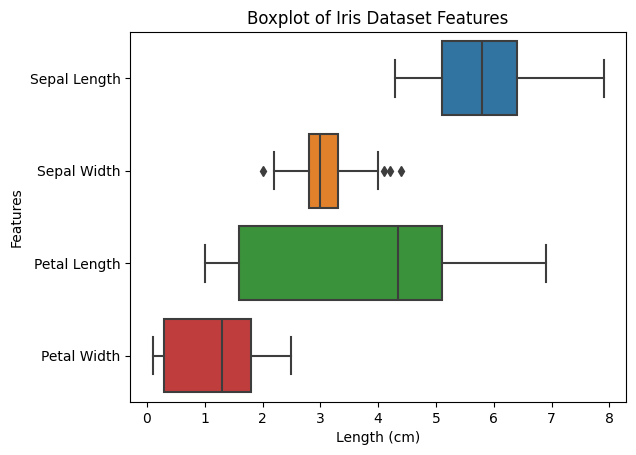

In [58]:

sns.boxplot(data=data, orient='h');
# Set x and y labels
plt.xlabel('Length (cm)')
plt.ylabel('Features')

feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
# Set y-tick labels to feature names
plt.yticks(ticks=np.arange(len(feature_names)), labels=feature_names)

# Show the plot
plt.title("Boxplot of Iris Dataset Features")
plt.show()

### Plot the data using Strip plot

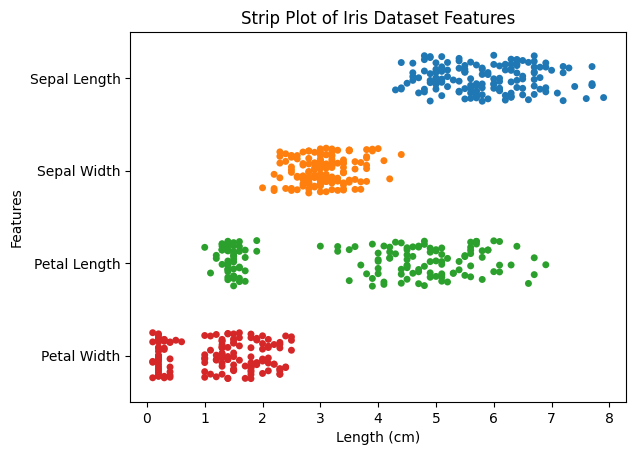

In [59]:
sns.stripplot(data=data, orient='h', jitter=0.25);
# Set x and y labels
plt.xlabel('Length (cm)')
plt.ylabel('Features')

feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
# Set y-tick labels to feature names
plt.yticks(ticks=np.arange(len(feature_names)), labels=feature_names)

# Show the plot
plt.title("Strip Plot of Iris Dataset Features")
plt.show()

### Plot the data using Violin Plot

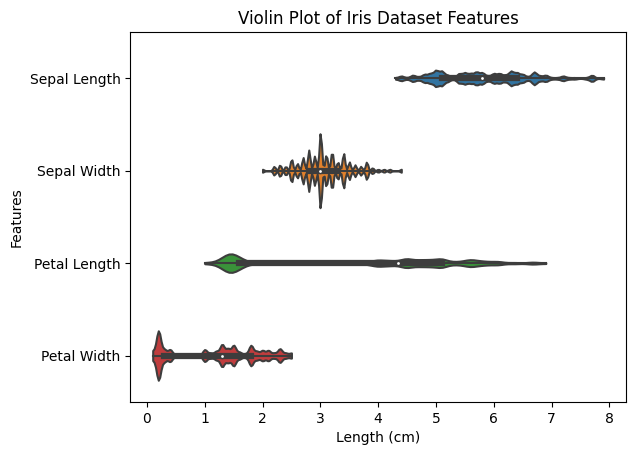

In [60]:
sns.violinplot(data=data, orient='h', bw=0.05, cut=0);
# Set x and y labels
plt.xlabel('Length (cm)')
plt.ylabel('Features')

feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
# Set y-tick labels to feature names
plt.yticks(ticks=np.arange(len(feature_names)), labels=feature_names)

# Show the plot
plt.title("Violin Plot of Iris Dataset Features")
plt.show()

### Now, Plot the data using RainCloud plot

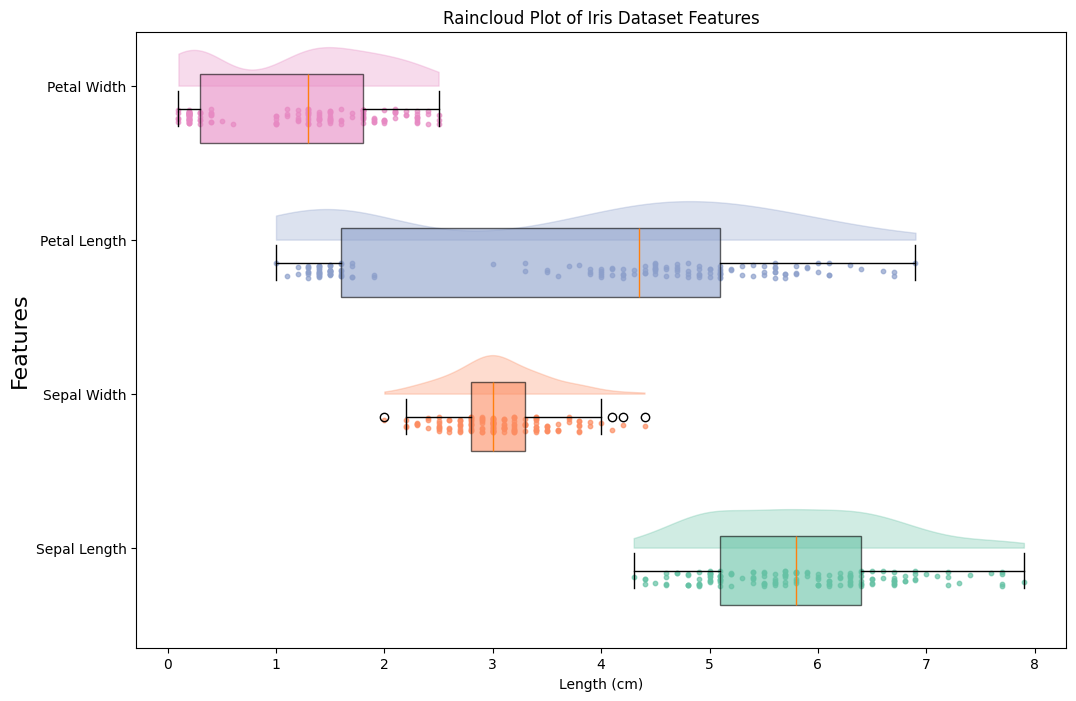

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))

# Use a Seaborn color palette for better aesthetics
palette = sns.color_palette("Set2", n_colors=len(data))

# Boxplot data with adjusted positions
box_positions = np.arange(1, len(data) + 1) - 0.15  # Shift boxplots slightly to the left
bp = ax.boxplot(data, patch_artist=True, vert=False, positions=box_positions)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Violinplot data
vp = ax.violinplot(data, points=500, 
                   showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=10, c=[palette[idx]], alpha=0.7)  # Adjusted size and transparency

# Set custom y-tick labels for the features
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.yticks(np.arange(1, len(data) + 1), feature_names)
plt.xlabel('Length (cm)')
plt.ylabel('Features', fontsize=16)
plt.title("Raincloud Plot of Iris Dataset Features")
plt.show()

### Brief conclusion: 
- **Efficiency**: RainCloud plots offer a more concise and informative way to visualize data, potentially reducing the need for extensive ink and paper usage.
- **Implementation**: The code for RainCloud plots is relatively easy to implement and customize, with minimal dependencies.